# City Analysis

In [1]:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import median
import numpy as np
from datetime import datetime

In [2]:
conn = lite.connect('../src/db/flatmates_data.db')

In [3]:
query = """SELECT *
FROM flatmates_rent_listings 
"""
df = pd.read_sql_query(query,conn)
len(df)

19305

In [4]:
df.head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168,0,1,Share House,4,1,4,1644358725
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215,0,1,Share House,4,1,1,1644358725
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163,0,1,Share House,4,3,4,1644358725
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207,0,1,Flatshare,2,1,2,1644358725
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220,0,1,Share House,3,3,3,1644358725


In [5]:
df['city'] = df.apply(lambda x: x['city'].strip(),axis=1)

In [6]:
cities = ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Canberra","Hobart","Darwin"]
df = df[df['city'].isin(cities)]
df['city'].unique()

array(['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Adelaide', 'Canberra',
       'Hobart'], dtype=object)

In [7]:
df['date'] = df.apply(lambda x: datetime.fromtimestamp(int(x['date'])).strftime('%d-%m-%Y')
         if '-' not in str(x['date']) else x['date']
         ,axis=1)

In [8]:
df

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168,0,1,Share House,4,1,4,09-02-2022
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215,0,1,Share House,4,1,1,09-02-2022
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163,0,1,Share House,4,3,4,09-02-2022
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207,0,1,Flatshare,2,1,2,09-02-2022
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220,0,1,Share House,3,3,3,09-02-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
19300,P1194881,/share-house-adelaide-5000-P1194881,Adelaide,Adelaide,200,True,1,Flatshare,4,1,4,28-05-2022
19301,P1194883,/share-house-adelaide-5000-P1194883,Adelaide,Adelaide,230,False,1,Flatshare,3,2,3,28-05-2022
19302,P1150911,/share-house-adelaide-christies-beach-5165-P11...,Christies Beach,Adelaide,175,False,1,Share House,3,2,3,28-05-2022
19303,P1140215,/homestay-adelaide-5000-P1140215,Adelaide,Adelaide,300,False,1,Homestay,1,1,2,28-05-2022


In [9]:
df['date'] = pd.to_datetime(df['date'],format='%d-%m-%Y')
df.sort_values(by='date')

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168,0,1,Share House,4,1,4,2022-02-09
78,P896637,/share-house-melbourne-burwood-3125-P896637,Burwood,Melbourne,160,1,2,Share House,6,2,6,2022-02-09
77,P1145789,/share-house-melbourne-point-cook-3030-P1145789,Point Cook,Melbourne,210,0,1,Share House,4,2,1,2022-02-09
76,P1134350,/share-house-melbourne-berwick-3806-P1134350,Berwick,Melbourne,250,0,1,Share House,4,2,3,2022-02-09
75,P1151468,/share-house-melbourne-berwick-3806-P1151468,Berwick,Melbourne,290,1,1,Share House,4,2,3,2022-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...
18141,P689914,/granny-flat-sydney-mount-colah-2079-P689914,Mount Colah,Sydney,285,True,1,Granny Flat for rent,1,1,0,2022-05-28
18140,P1168167,/share-house-sydney-randwick-2031-P1168167,Randwick,Sydney,0,False,1,Share House,2,1,2,2022-05-28
18139,P813686,/granny-flat-sydney-riverview-2066-P813686,Riverview,Sydney,320,True,1,Granny Flat for rent,1,1,0,2022-05-28
18149,P467691,/share-house-sydney-colyton-2760-P467691,Colyton,Sydney,185,True,1,Share House,3,1,2,2022-05-28


In [22]:
df.where(df['date'] >= "2022-05-27").groupby(['date','city']).median()

price  rooms_available  bedroom_count  bathroom_count  \
date       city                                                               
2022-05-28 Adelaide   200.0              1.0            3.0             2.0   
           Brisbane   232.5              1.0            3.0             2.0   
           Canberra   257.5              1.0            3.0             2.0   
           Hobart     189.5              1.0            3.0             1.0   
           Melbourne  225.0              1.0            3.0             2.0   
           Perth      220.0              1.0            3.0             2.0   
           Sydney     300.0              1.0            2.0             2.0   

                      people_count  
date       city                     
2022-05-28 Adelaide            3.0  
           Brisbane            2.0  
           Canberra            2.0  
           Hobart              2.5  
           Melbourne           2.0  
           Perth               2.0  
           Sydney              2.0

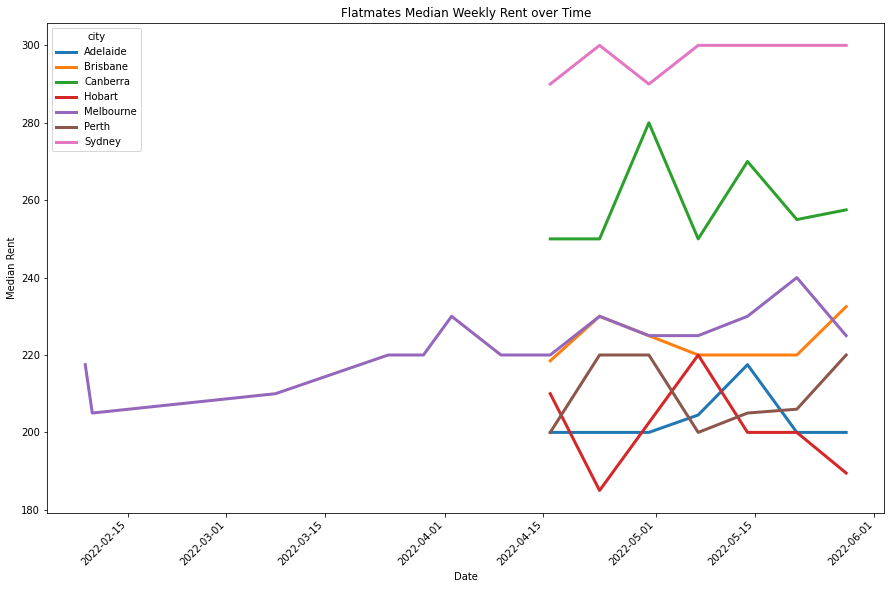

In [13]:
# plt.style.use('fivethirtyeight')

df.groupby(['date','city']) \
    .median()['price'] \
    .unstack() \
    .plot(
    figsize=(15,10),
    linewidth=3)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Median Rent")
plt.title("Flatmates Median Weekly Rent over Time")
plt.show()

In [ ]:
city = 'Sydney'

In [ ]:
query = """
SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price, date
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
AND average_price < 270
ORDER BY average_price DESC 
LIMIT 50
"""
df = pd.read_sql_query(query,conn)
df

In [ ]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY average_price DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

In [ ]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
AND NOT house_type = "Student Accommodation"
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY rooms_available DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

In [ ]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price  
LIMIT 10
"""
df = pd.read_sql_query(query,conn)
df